# 201958061 박한나 HW3

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv('HW3.csv', index_col=0)

## 1. 처음 3개 샘플 출력 및 특성 개수, 샘플 개수 파악

In [24]:
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


특성 개수 : 10개  관측치 : 400개   결측치 없음  
수치형 특성 : Income, Limit, Rating, Cards, Age, Education  
범주형 특성 : Gender, Student, Married, Ethnicity

In [26]:
feat = [name for name in df.columns if name != 'Balance']
cat_feat = [name for name in feat if df[name].dtype == 'object']
num_feat = [name for name in feat if name not in cat_feat]

In [27]:
print(feat)
print(cat_feat)
print(num_feat)

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity']
['Gender', 'Student', 'Married', 'Ethnicity']
['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']


## 2. 수치형 특성(hist), 범주형 특성(bar) 해당 그래프 작성

수치형 특성 - hist 

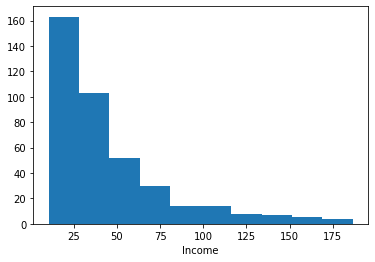

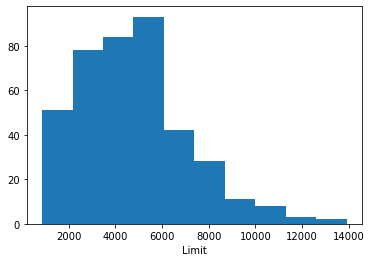

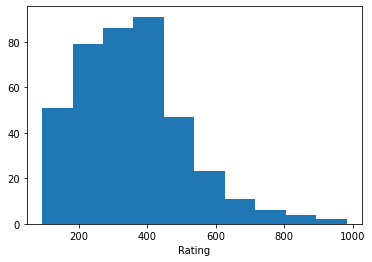

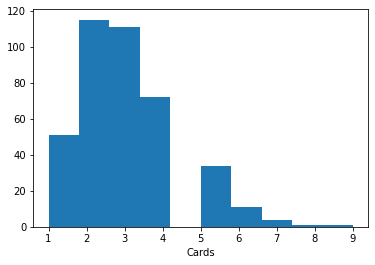

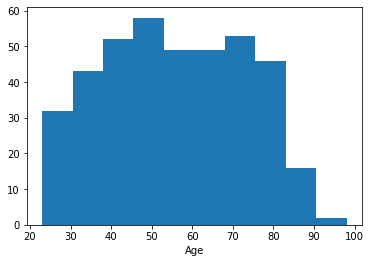

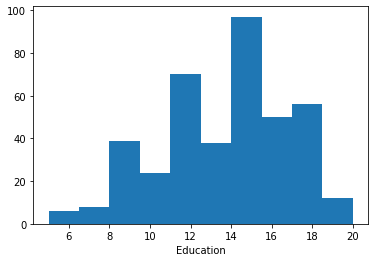

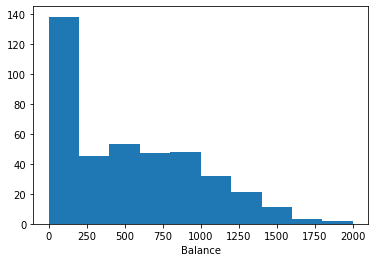

In [28]:
#Income
plt.hist(df['Income'])
plt.xlabel('Income')
plt.show()

#Limit
plt.hist(df['Limit'])
plt.xlabel('Limit')
plt.show()

#Rating
plt.hist(df['Rating'])
plt.xlabel('Rating')
plt.show()

#Cards
plt.hist(df['Cards'])
plt.xlabel('Cards')
plt.show()

#Age
plt.hist(df['Age'])
plt.xlabel('Age')
plt.show()

#Education
plt.hist(df['Education'])
plt.xlabel('Education')
plt.show()

#Balance
plt.hist(df['Balance'])
plt.xlabel('Balance')
plt.show()

수치형 변수 히스토그램 : Education, Age 제외 다른 특성은 왼쪽으로 치우쳐져 있음  
Balance는 특히 잔고가 0인 고객이 많음

범주형 특성 - bar

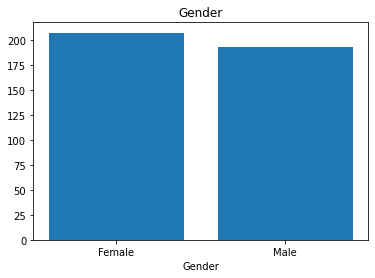

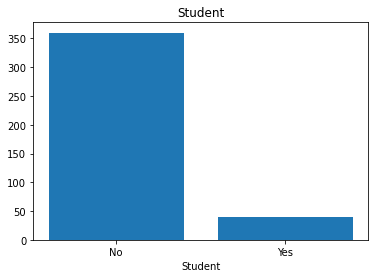

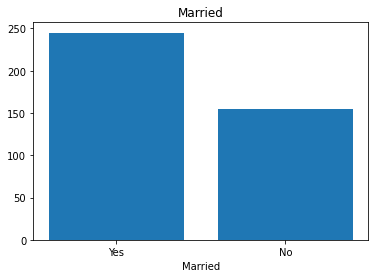

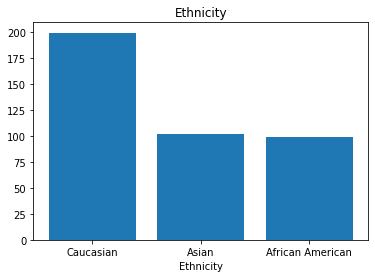

In [29]:
#Gender
counts = df['Gender'].value_counts()
labels = counts.index
plt.bar(labels, counts.values)
plt.xlabel('Gender')
plt.title('Gender')
plt.show()

#Student
counts = df['Student'].value_counts()
labels = counts.index
plt.bar(labels, counts.values)
plt.xlabel('Student')
plt.title('Student')
plt.show()

#married
counts = df['Married'].value_counts()
labels = counts.index
plt.bar(labels, counts.values)
plt.xlabel('Married')
plt.title('Married')
plt.show()

#Ethnicity
counts = df['Ethnicity'].value_counts()
labels = counts.index
plt.bar(labels, counts.values)
plt.xlabel('Ethnicity')
plt.title('Ethnicity')
plt.show()

범주형 변수 막대그래프 : 학생이 아닌 고객이 많음

## 3. corr() 메소드 적용 후 변수간의 상관계수 출력 및 해석  

In [30]:
df.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


Limit, Rating은 양의 상관관계를 보임  
Imcome과 Limit, Income과 Rating은 양의 상관관계를 보임   
Balance는 Limit, Rating과 상관관계가 높음

## 4. 각 수치형 특성과 Balance 변수와의 scatter 를 subplot으로 작성

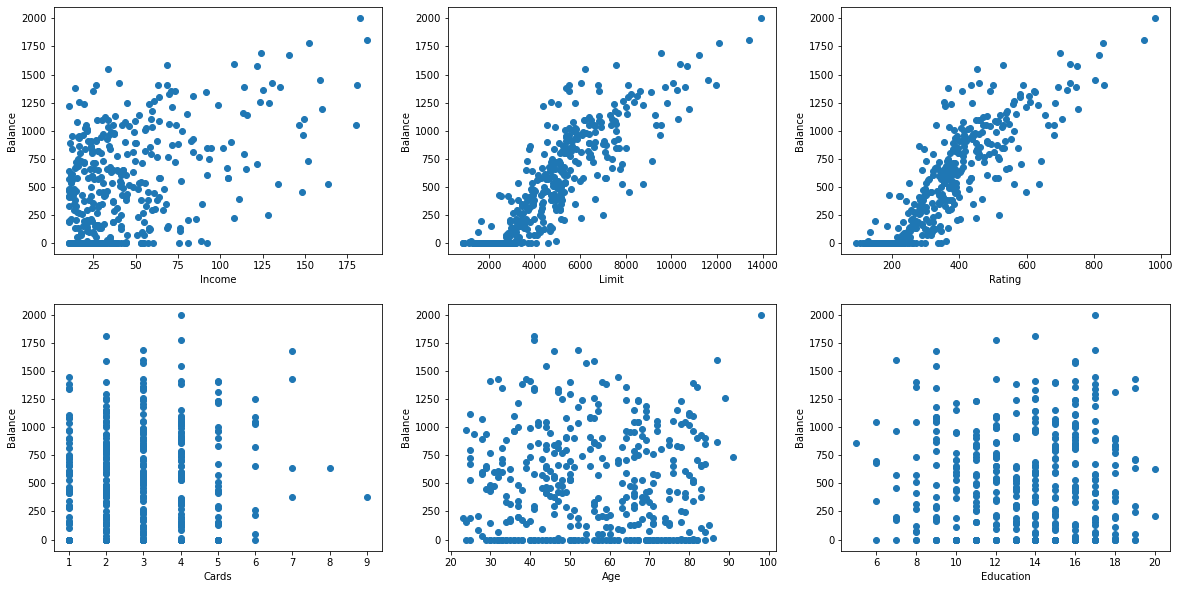

In [32]:
#수치형 특성 : Income, Limit, Rating, Cards, Age, Education

plt.figure(figsize=(20,10))
for i in range(1, 7):
    plt.subplot(2,3,i)
    plt.scatter(df.iloc[:, i-1], df.iloc[:, 10])
    plt.xlabel(df.columns[i-1])
    plt.ylabel(df.columns[10])

Limit, Rating 값이 커질수록 Balance도 커지는 경향이 강하게 있음.  
따라서 Balance와 강한 상관관계를 이룬다고 봄  
Income도 값이 커질수록 Balance 값도 커지지만 Limit, Rating 정도의 경향은 아님

# 5. Rating으로 Balance 설명 - 단순선형회귀 사용

In [33]:
X = df.loc[:, 'Rating'].to_numpy()

In [34]:
X = X[:, np.newaxis]

In [36]:
X.shape

(400, 1)

In [37]:
y = df['Balance'].to_numpy()

In [38]:
from sklearn.linear_model import LinearRegression

reg1 = LinearRegression()
reg1.fit(X, y)

LinearRegression()

In [42]:
print( reg1.coef_,reg1.intercept_)
pred = reg1.predict(X)

[2.56624033] -390.84634178723786


In [41]:
score = reg1.score(X, y)
score

0.7458484180585037

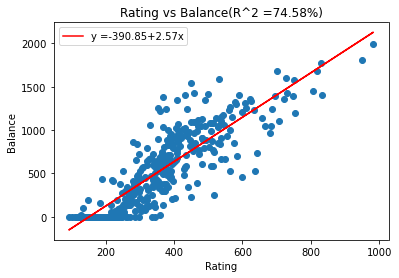

In [45]:
plt.scatter(X, y)
plt.xlabel('Rating')
plt.ylabel('Balance')
labels = 'y =' + str(round(reg1.intercept_,2)) + '+' +str(round(reg1.coef_[0],2)) + 'x'
plt.plot(X, pred, color = 'r', label=labels)
plt.title('Rating vs Balance' + '(R^2 =' +str(round(score,4)*100) + '%)')
plt.legend();

결정 계수 의미 : Rating으로 Balance의 74.58% 설명  
회귀직선식 : Balance = 390.85 + 2.57(Rating)

# 6. 모든 수치형 특성과 Balace 설명 - 선형회귀

In [57]:
X = df.iloc[:, :6].values
y = df['Balance'].values
X.shape

(400, 6)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=0)

reg2 = LinearRegression()
reg2.fit(X_train, y_train)
print(reg2.coef_, reg2.intercept_)

[-7.90523312  0.15976222  1.56900826 14.42490726 -0.60836095  2.94113733] -486.6594364191833


In [64]:
reg2.score(X_train, y_train)

0.8857073035585357

In [65]:
reg2.score(X_test, y_test)

0.8557914117915563

훈련 데이터에 대한 결정계수가 0.8857이므로 1에 가깝다고 할 수 있음. 따라서 과소 적합이 아님. 또 test set 결정계수가 train set에 대한 결정계수와 차이가 크지 않음 따라서 과대 적합도 아님  
하지만 Limit, Rating 특성은 유사한 특성임 띠라서 회귀 모형에는 한가지 특성만 포함해야 더 단순한 모형을 고려할 수 있음 

예측 :  Income 100, Limit 6000, Rating 550, Card 5, 나이 55, 교육년수 20

In [66]:
pred = [[100, 6000, 550, 5, 55, 20]]
reg2.predict(pred)

array([641.83257176])